In [84]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\002CL0744\AppData\Local\Temp\ipykernel_38636\1041966425.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [85]:
# Data generate
def generateDataset(m):
    X = np.random.randn(m)*10
    noise = np.random.randn(m)
    y = 3*X + 1 + 4*noise
    return X,y
    
# plt.scatter(X,Y)
# plt.show()

In [86]:
X,y = generateDataset(100)
print(X.shape, y.shape)

(100,) (100,)


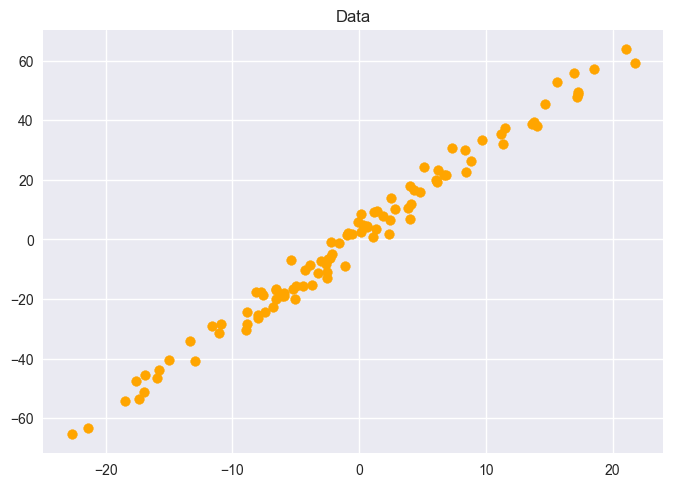

In [87]:
def plotData(X, y, color="orange", title ="Data"):
    plt.title(title)
    plt.scatter(X,y, c=color)
    plt.show()

plotData(X,y)

In [88]:
def normaliseData(X):
    X = (X-X.mean())/X.std()
    return X

-0.6180446633847886 9.811795807875479


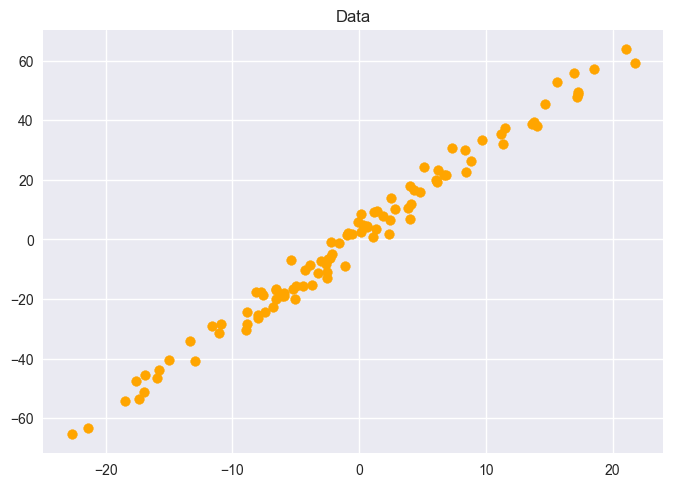

-3.9968028886505634e-17 1.0


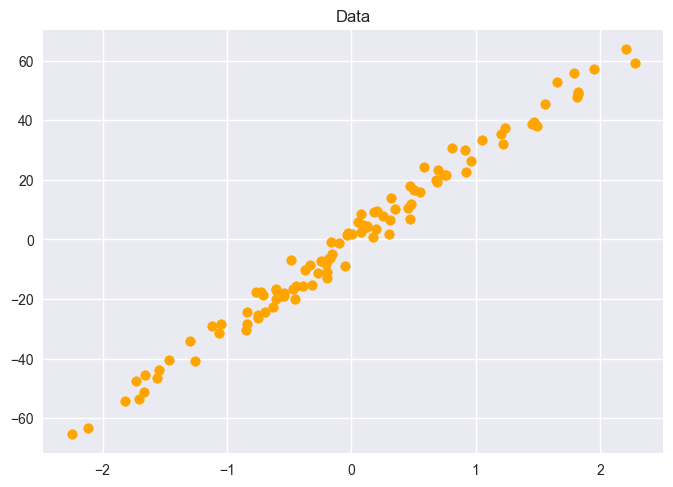

In [89]:
print(X.mean(), X.std())
plotData(X,y)
X = normaliseData(X)
print(X.mean(), X.std())
plotData(X,y)

In [90]:
def trainTestSplit(X, y, split=0.8):
    m = X.shape[0]
    data = np.zeros((m,2))
    data[:,0] = X
    data[:,1] = y
    np.random.shuffle(data)

    split = int(split*m)

    # Train data
    XT = data[:split, 0]
    yT = data[:split, 1]

    # Test data
    Xt = data[split:, 0]
    yt = data[split:, 1]

    return XT, yT, Xt, yt


In [91]:
X_train, y_train, X_test, y_test = trainTestSplit(X,y,0.7)
print(X_train.size,X_test.size)
print(y_train.size,y_test.size)

70 30
70 30


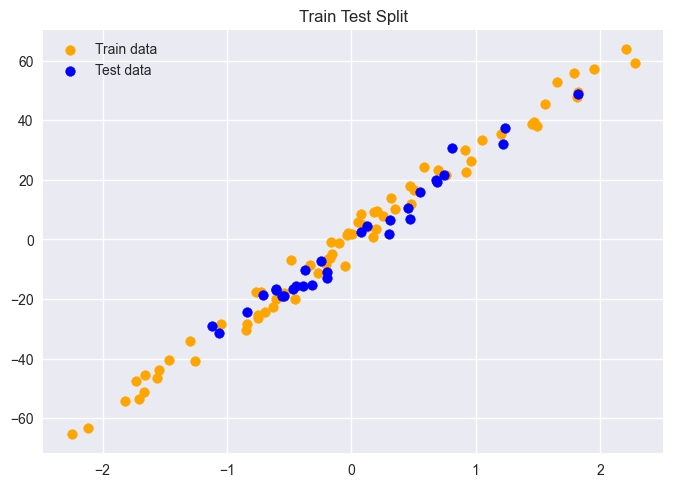

In [92]:
plt.title("Train Test Split")
plt.scatter(X_train, y_train, color = 'orange', label='Train data')
plt.scatter(X_test, y_test, color = 'blue', label = "Test data")
plt.legend()

In [93]:
# Hypothesis
def hypothesis(X, theta):
    return theta[0]+theta[1]*X

def error(X, y, theta):
    m = X.size
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i], theta)
        e = e + (y[i] - y_i)**2
    return e/(2*m)  

def Gradient(X,y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i], theta) - y[i]
        grad[0] += exp
        grad[1] += exp*X[i]
    
    return grad/m

def train (X,y, learning_rate = 0.1, maxItrs = 100):
    theta = np.zeros((2,))
    error_list = []

    for i in range(maxItrs):
        grad = Gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]

    plt.plot(error_list)
    return theta

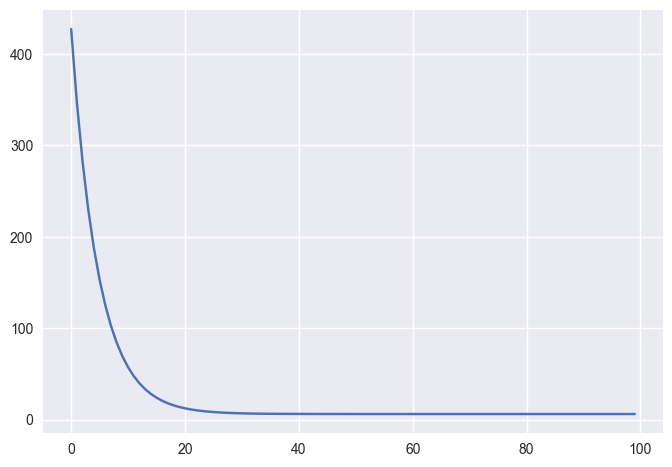

In [94]:
theta = train(X,y)

In [96]:
theta

array([-0.54149592, 29.00779863])

In [99]:
def predict(X, theta):
    return hypothesis(X,theta)

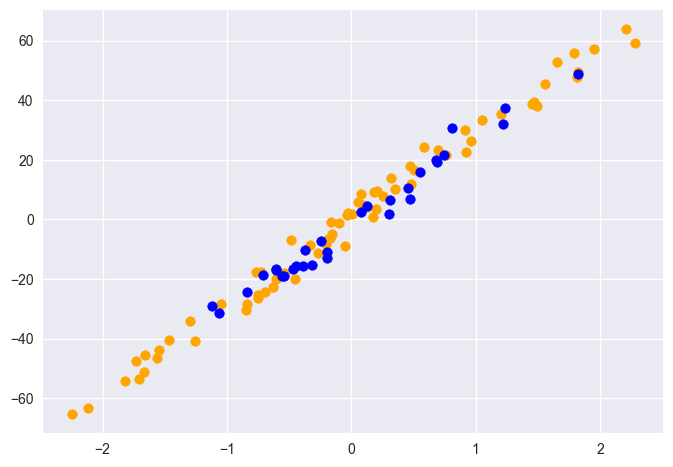

In [113]:
plt.scatter(X_train, y_train, color = 'orange')
plt.scatter(X_test, y_test, color = 'blue')
plt.show()

In [101]:
yp = predict(X_test,theta)

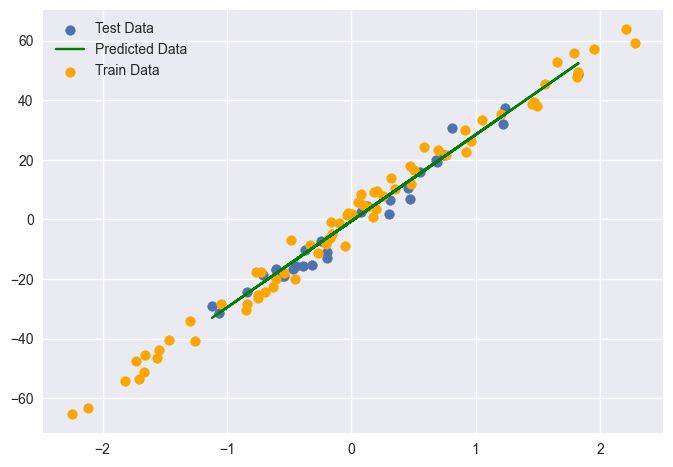

In [112]:
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, yp, color="green", label="Predicted Data")
plt.scatter(X_train, y_train, color = 'orange', label="Train Data")
plt.legend()

In [115]:
# Model evaluation
def r2score(y, yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y-ymean)**2)

    return 1-(num/denom)

r2score(y_test, yp)


0.9734002819897147

In [125]:
T0 = np.arange(-120, 150, 10)
T1 = np.arange(-120, 150, 10)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros((T0.shape))

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]
        J[i,j] = np.mean((y-yp)**2)/2

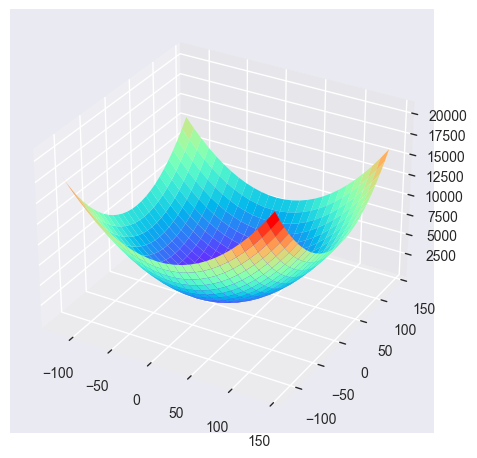

In [126]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

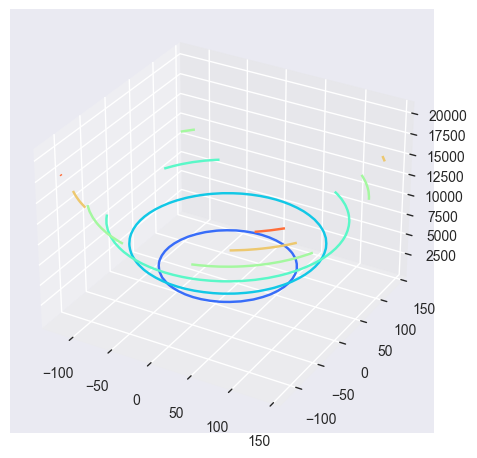

In [127]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()